#### additional lipidomic plots PM

In [1]:
library(ggplot2)
library(ggsignif)
library(SingleCellExperiment)

Warning message:
“package ‘ggplot2’ was built under R version 3.6.3”Warning message:
“package ‘ggsignif’ was built under R version 3.6.3”Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.in

In [2]:
# load PM lipidomic data
data = readRDS('../../ABCA7lof//processed_data/for_plotting/lipidomics.rds')
d = data$pm_all
cts = assays(d)$counts
class = rowData(d)$lipid.class
cts$class = class

# sum lipidomic data by class
result <- aggregate(. ~ class, data = cts[cts$class %in% unique(class), ], sum)
rownames(result) = result$class
result$class = NULL
df =  as.data.frame(t(result))
total = rowSums(df)
genotype = colData(d)$LOF_status
df = as.data.frame(cbind(df, genotype, total))

In [3]:
head(df)

,AcCa,AcHexChE,AEA,CarE,Cer,CerG3GNAc1,ChE,CL,Co,cPA,⋯,SPH,SPHP,SQDG,ST,StE,TG,WE,ZyE,genotype,total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1A,6.2300e+10,3e+08,9.10e+09,7.0e+07,386842200000,8.56e+09,4.0020e+11,3.52151e+11,1.2e+10,2e+08,⋯,8.100e+09,0e+00,4.401e+09,1.0e+08,5e+08,87894000000,5.650e+10,4.4900e+10,CON,1.250676e+13
5C,3.1270e+10,4e+07,6.07e+09,1.0e+08,228500000000,7.30e+09,4.1020e+11,5.36492e+11,5.7e+10,2e+08,⋯,5.080e+09,7e+06,8.740e+08,2.4e+08,2e+08,682171000000,1.200e+08,1.3900e+10,CON,1.211328e+13
7D,3.6670e+10,5e+07,9.90e+09,1.0e+08,302010000000,6.30e+09,4.2890e+11,5.38716e+11,6.9e+10,2e+08,⋯,8.300e+09,0e+00,1.730e+09,6.0e+08,1e+08,411700600000,1.615e+10,1.2820e+10,CON,1.222214e+13
9E,5.5391e+10,1e+08,7.70e+09,3.6e+08,468780000000,6.69e+09,5.0900e+11,5.44110e+11,6.8e+10,5e+08,⋯,6.720e+09,9e+07,2.170e+09,4.0e+08,2e+08,314180000000,1.540e+10,1.2110e+10,CON,1.285725e+13
13G,4.6470e+10,8e+07,6.41e+09,2.5e+08,372950000000,4.40e+09,5.0240e+11,5.61390e+11,7.6e+10,1e+08,⋯,5.150e+09,0e+00,1.267e+09,2.0e+08,5e+08,519490000000,8.000e+08,1.1200e+10,CON,1.309803e+13
19J,7.4652e+10,1e+08,8.53e+09,6.0e+08,381990000000,4.30e+09,5.0834e+11,4.73250e+11,5.2e+10,8e+08,⋯,6.476e+09,2e+06,2.070e+09,2.0e+08,2e+08,328610000000,1.608e+10,1.6104e+10,CON,1.212852e+13


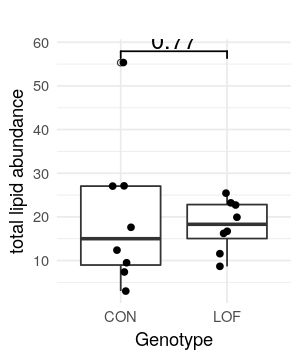

In [33]:
options(repr.plot.width = 2.5, repr.plot.height = 3)

#pdf('../pdf_figures/pm_total_lipid.pdf', width=2.5, height=3)
ggplot(df, aes(x = genotype, y = TG/MG)) +
  geom_boxplot(outlier.shape = 1) +
  labs(x = "Genotype", y = "total lipid abundance", title = "") +
  theme_minimal() +   geom_jitter(width=.1) + geom_signif(comparisons = list(c("CON", "LOF")), textsize = 5, test = "t.test", map_signif_level = F) #+ ylim(c(0,1.5e+13))
#dev.off()

In [26]:
options(repr.plot.width = 2.5, repr.plot.height = 3)

pdf('../pdf_figures/pm_PC_total.pdf', width=2.5, height=3)
ggplot(df, aes(x = genotype, y = PC/total)) +
  geom_boxplot(outlier.shape = 1) +
  labs(x = "Genotype", y = "PC/total", title = "") +
  theme_minimal() + geom_signif(comparisons = list(c("CON", "LOF")), textsize = 5, test = "t.test", map_signif_level = F) #+ ylim(c(0,1.5e+13))
dev.off()

png 
  2

In [28]:
options(repr.plot.width = 2.5, repr.plot.height = 3)

pdf('../pdf_figures/pm_TG_total.pdf', width=2.5, height=3)
ggplot(df, aes(x = genotype, y = TG/total)) +
  geom_boxplot(outlier.shape = 1) +
  labs(x = "Genotype", y = "TG/total", title = "") +
  theme_minimal() + geom_signif(comparisons = list(c("CON", "LOF")), textsize = 5, test = "t.test", map_signif_level = F) #+ ylim(c(0,1.5e+13))
dev.off()

png 
  2

In [13]:
df$MG/df$TG

[1] 0.33335609 0.01807465 0.03687145 0.05678274 0.03699782 0.08064271
 [7] 0.10535500 0.13544643 0.04406830 0.04312372 0.06171650 0.08657128
[13] 0.03933188 0.05027745 0.11559002 0.05985702

In [ ]:
ggplot(df, aes(x = genotype, y = TG/total)) +
  geom_boxplot(outlier.shape = 1) +
  labs(x = "Genotype", y = "TG/total", title = "") +
  theme_minimal() +   geom_jitter(width=.1) + geom_signif(comparisons = list(c("CON", "LOF")), textsize = 5, test = "t.test", map_signif_level = F) #+ ylim(c(0,1.5e+13))
dev.off()

In [194]:
options(repr.plot.width = 2.5, repr.plot.height = 3)

pdf('../pdf_figures/pm_pc_over_total.pdf', width=2.5, height=3)
ggplot(df, aes(x = genotype, y = PC/total)) +
  geom_boxplot(outlier.shape = 1) +
  labs(x = "Genotype", y = "PC/total", title = "") +
  theme_minimal() +   geom_jitter(width=.1) + geom_signif(comparisons = list(c("CON", "LOF")), textsize = 5, test = "t.test", map_signif_level = F) #+ ylim(c(0,1.5e+13))
dev.off()

png 
  2

In [193]:
options(repr.plot.width = 2.5, repr.plot.height = 3)

pdf('../pdf_figures/pm_pc_to_tg.pdf', width=2.5, height=3)
ggplot(df, aes(x = genotype, y = PC/TG)) +
  geom_boxplot(outlier.shape = 1) +
  labs(x = "Genotype", y = "PC:TG", title = "") +
  theme_minimal() +   geom_jitter(width=.1) + geom_signif(comparisons = list(c("CON", "LOF")), textsize = 5, test = "t.test", map_signif_level = F) #+ ylim(c(0,1.5e+13))
dev.off()

png 
  2

In [159]:
# load PM lipidomic data
data = readRDS('../../ABCA7lof//processed_data/for_plotting/lipidomics.rds')
d = data$pm_all
cts = assays(d)$counts
class = rowData(d)$lipid.Class
cts$class = class

# sum lipidomic data by class
result <- aggregate(. ~ class, data = cts[cts$class %in% unique(class), ], sum)
rownames(result) = result$class
result$class = NULL
df =  as.data.frame(t(result))
total = rowSums(df)
genotype = colData(d)$LOF_status
df = as.data.frame(cbind(df, genotype, total))

In [161]:
df

,Fatty acyl and other lipids,Fatty acyl carnitines,Glycerophospholipids,Glycoglycerolipids,Neutral lipids,Phospholipids,Sphingolipids,genotype,total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1A,1.676830e+12,7.0e+07,5.9200e+10,24040000000,7.976440e+11,8.343490e+12,1.605482e+12,CON,1.250676e+13
5C,1.609160e+12,1.0e+08,5.0470e+10,14521800000,1.322331e+12,8.115738e+12,1.000957e+12,CON,1.211328e+13
7D,1.634570e+12,1.0e+08,4.3640e+10,14170000000,1.054841e+12,8.296378e+12,1.178440e+12,CON,1.222214e+13
9E,1.459875e+12,3.6e+08,5.1500e+10,18130000010,1.063674e+12,8.780126e+12,1.483580e+12,CON,1.285725e+13
13G,1.417170e+12,2.5e+08,3.9170e+10,17149000000,1.293270e+12,8.937843e+12,1.393180e+12,CON,1.309803e+13
19J,1.543582e+12,6.0e+08,4.5760e+10,21205000000,1.196294e+12,7.874193e+12,1.446888e+12,CON,1.212852e+13
21K,1.845725e+12,1.0e+08,4.0700e+10,30930000000,1.114094e+12,9.224849e+12,1.335709e+12,CON,1.359211e+13
23L,1.423292e+12,2.0e+08,3.7780e+10,18651000000,1.024765e+12,8.562863e+12,1.450415e+12,CON,1.251797e+13
3B,8.955310e+11,1.0e+08,2.5456e+10,10321670000,3.876475e+11,5.520522e+12,9.545240e+11,LOF,7.794102e+12


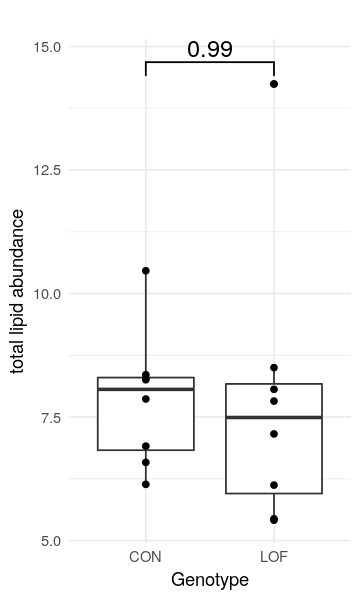

In [164]:
options(repr.plot.width = 3, repr.plot.height = 5)

ggplot(df, aes(x = genotype, y = df[,'Phospholipids']/df[,'Neutral lipids'])) +
  geom_boxplot() +
  labs(x = "Genotype", y = "total lipid abundance", title = "") +
  theme_minimal() +   geom_point() + geom_signif(comparisons = list(c("CON", "LOF")), textsize = 5, test = "t.test", map_signif_level = F) #+ ylim(c(0,1.5e+13))

In [221]:
plot_volcano = function(sce, ratio_name, pval_name, pval_cut, lfc_cut, adjust, annotation1, class_cols){
    cols = c('dodgerblue2', 'grey', 'red')
    names(cols) = c('down', 'other', 'up')
    temp = as.data.frame(rowData(sce)[,c(ratio_name, pval_name, annotation1)])
    colnames(temp) = c('log2', 'pvalue', 'label')
    if(adjust){
        temp$pvalue = p.adjust(temp$pvalue, 'fdr')
    }
    temp$direction = ifelse(temp$log2>lfc_cut & temp$pvalue<pval_cut, 'up', ifelse(temp$log2< -1*lfc_cut & temp$pvalue<pval_cut, 'down', 'other'))
    temp$label2 = ifelse(temp$direction!='other', temp$label,'')
    p = ggplot(temp, aes(x=log2, y= -log10(pvalue), col=direction, label = label2))+ geom_text_repel(max.overlaps = Inf, size = 3.5)+  scale_color_manual(values = cols) + geom_point(aes(alpha = 0.01), size = 2, show.legend = FALSE)+theme_classic() +   theme(text = element_text(size=10),strip.background = element_blank(),strip.placement = "outside" ,strip.text.y = element_text(size = 10, color = "black"))+ theme(legend.position='none')#+ #facet_wrap(~label, ncol = 7, scales = "free_x")
    return(p+xlab('log2(fold change)')+ylab('-log10(p-value)'))
}

In [203]:
options(repr.plot.width = 5, repr.plot.height = 4)

# show the top lipid species
library(ggrepel)

pdf('../pdf_figures/pm_volcano.pdf', width=5, height=4)
plot_volcano(data$pm_all, 'stats.log2', 'stats.pvalue',  0.1, 1, FALSE, 'lipid.key', c('brown1'))+xlim(c(-4,4))
dev.off()

Warning message:
“Removed 4 rows containing missing values (geom_text_repel).”Warning message:
“Removed 4 rows containing missing values (geom_point).”

png 
  2

#### choline

In [5]:
# load the iN lipidomics data
data = readRDS('../../ABCA7lof//processed_data/for_plotting/lipidomics.rds')
d = data$ngn2_all
cts = assays(d)$counts
class = rowData(d)$lipid.class
cts$class = class

# sum by lipid class
result <- aggregate(. ~ class, data = cts[cts$class %in% unique(class), ], sum)
rownames(result) = result$class
result$class = NULL
df =  as.data.frame(t(result))
total = rowSums(df)
df = as.data.frame(cbind(df, colData(d)[,c('Genotype', 'treatment', 'Cell counts')], total))

df2 = df[df$treatment!='N/A',]
df2$grp = paste0(df2$Genotype, df2$treatment)
df2$Genotype = factor(df2$Genotype, levels = c('Control', 'ABCA7 LoF'))

In [80]:
df2

,Cer,ChE,CL,Co,DG,DGDG,DLCL,FA,Hex1Cer,Hex2Cer,⋯,ST,StE,TG,WE,ZyE,Genotype,treatment,Cell.counts,total,grp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<chr>
s3.1,4683058840,878951839,835750120,0,1183674515,19344485,0,0,331208728,189017.4,⋯,0,44259978,33242001004,122448979,125556711,Control,H2O,395200,84477434753,ControlH2O
s3.2,3899455962,692914800,432954511,0,1023382588,14220241,0,0,406437239,0.0,⋯,78081979,79578300,21346236326,414022639,192133436,Control,H2O,395200,79056163502,ControlH2O
s3.3,9308883116,565771756,606315472,0,983766274,24251070,0,739229703,280067493,0.0,⋯,0,45751927,12319187351,214267748,105156481,Control,H2O,395200,63026130073,ControlH2O
s4.1,4387592327,513471724,777020267,0,1390494204,18195756,0,0,539564475,668989.2,⋯,0,201676532,35648454593,109430031,288571049,ABCA7 LoF,H2O,395200,87469724691,ABCA7 LoFH2O
s4.2,4799440330,1058513217,473178837,0,1944281460,15104015,0,0,609414661,0.0,⋯,0,221294915,68059116220,147261636,409570568,ABCA7 LoF,H2O,395200,116455727392,ABCA7 LoFH2O
s4.3,5113483548,1182372128,726511151,0,1635291675,16224079,0,0,595800148,1338206.8,⋯,0,187379355,76144538758,152468681,349341915,ABCA7 LoF,H2O,395200,119773385338,ABCA7 LoFH2O
s5.1,4854882995,971190785,1749933582,0,1789627655,22255456,0,0,813067667,370519.4,⋯,0,157275151,65958562606,321554251,348564021,ABCA7 LoF,Choline,395200,112224193059,ABCA7 LoFCholine
s5.2,9285148251,2275702687,2866769190,63413256,5500420747,10208548,0,0,2048558362,20058720.4,⋯,0,643687500,137114827354,118499454,1122059501,ABCA7 LoF,Choline,444000,281916488524,ABCA7 LoFCholine
s5.3,8758617197,1837919347,1280433337,0,4227391376,17413296,0,0,1477698161,5460305.0,⋯,0,417461051,113000209601,222561236,730833241,ABCA7 LoF,Choline,395200,210331317730,ABCA7 LoFCholine


In [81]:
data = readRDS('../../ABCA7lof//processed_data/for_plotting/lipidomics.rds')
key = read.csv('../../ABCA7lof//raw_data/ngn2_data/lipidkey.csv', sep = '\t')
key = key[!duplicated(key$Key),]
rownames(key) = key$Key
rowData(data$ngn2_all)$Class = as.character(key[rowData(data$ngn2_all)$lipid.class,'Class'])

In [82]:
df = df[df$treatment!='N/A' & df$Genotype!='Control',]

In [85]:
T = df[, 1:31]/df$total
T$Genotype = df$Genotype
T$treatment = df$treatment
#T['PC:TG'] = T['PC']/T['TG']

Using Genotype, treatment as id variables


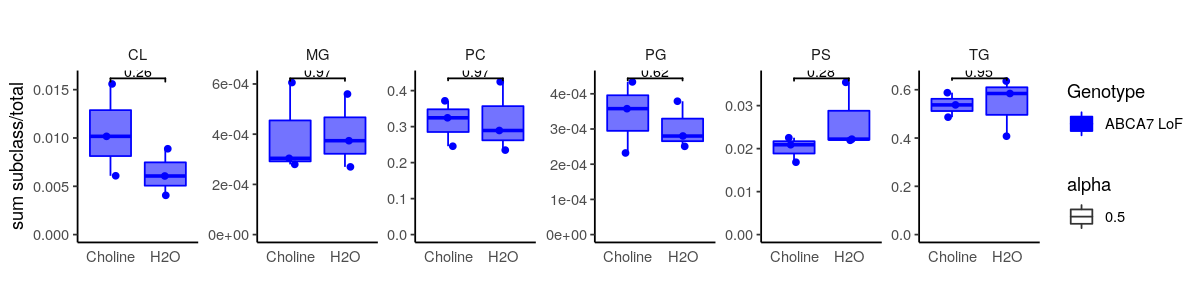

In [86]:
library(reshape2)
x = melt(T)
x = x[as.character(x$variable)%in%c('MG', 'PC', 'TG', 'CL', 'PS', 'PG',  'PC:TG'),]

options(repr.plot.width = 10, repr.plot.height = 2.5)

cols = c('grey', 'blue')
names(cols) = c('Control', 'ABCA7 LoF')
#x$Genotype = factor(x$Genotype, levels=c('H2O', 'Choline'))

#svg('../pdf_figures/ratios_iN.svg', width=5, height = 2.5)
ggplot(x, aes(x = treatment, y = value)) +
  geom_boxplot(aes(color=Genotype, fill=Genotype, alpha=.5)) +
  labs(x = "", y = "sum subclass/total", title = "") +
  theme_classic() + geom_jitter(aes(color=Genotype), width=.1) + scale_y_continuous(limits = c(0, NA)) + geom_signif(comparisons = list(c("H2O", "Choline")), textsize = 3, test = "t.test", map_signif_level = F) + scale_fill_manual(values = cols)  + scale_color_manual(values = cols) + facet_wrap(~variable, nrow=1, scales = "free") +   theme(
    ,  # Remove x-axis labels
    axis.ticks.x = element_blank() , strip.background = element_rect(fill = "white", color = NA)) + coord_cartesian(clip = "off")
#dev.off()

#### additional lipidomic plots iN

In [2]:
# load the iN lipidomics data
data = readRDS('../../ABCA7lof//processed_data/for_plotting/lipidomics.rds')
d = data$ngn2_all
cts = assays(d)$counts
class = rowData(d)$lipid.class
cts$class = class

# sum by lipid class
result <- aggregate(. ~ class, data = cts[cts$class %in% unique(class), ], sum)
rownames(result) = result$class
result$class = NULL
df =  as.data.frame(t(result))
total = rowSums(df)
df = as.data.frame(cbind(df, colData(d)[,c('Genotype', 'treatment', 'Cell counts')], total))

df2 = df[df$treatment!='Choline',]
df2$grp = paste0(df2$Genotype, df2$treatment)
df2$Genotype = factor(df2$Genotype, levels = c('Control', 'ABCA7 LoF'))

In [3]:
data = readRDS('../../ABCA7lof//processed_data/for_plotting/lipidomics.rds')
key = read.csv('../../ABCA7lof//raw_data/ngn2_data/lipidkey.csv', sep = '\t')
key = key[!duplicated(key$Key),]
rownames(key) = key$Key
rowData(data$ngn2_all)$Class = as.character(key[rowData(data$ngn2_all)$lipid.class,'Class'])

In [679]:
plot_volcano = function(sce, ratio_name, pval_name, pval_cut, lfc_cut, adjust, annotation1, cols){
    temp = as.data.frame(rowData(sce)[,c(ratio_name, pval_name, annotation1)])
    colnames(temp) = c('log2', 'pvalue', 'label')
    if(adjust){
        temp$pvalue = p.adjust(temp$pvalue, 'fdr')
    }
    temp$direction = ifelse(temp$log2>lfc_cut & temp$pvalue<pval_cut, 'up', ifelse(temp$log2< -1*lfc_cut & temp$pvalue<pval_cut, 'down', 'other'))
    labs = temp$label[temp$direction!='other']
    temp$label2 = ifelse(temp$label%in%labs, temp$label, 'other')#temp$direction!='other' | temp$, temp$label,'other')
    temp$rank = rank(temp$log2)
    temp = temp[temp$label2!='other',]
    p = ggplot(temp, aes(x=log2, y=-log10(pvalue), col=label2))+   scale_color_manual(values = cols) +  geom_point(aes(alpha = ifelse(temp$direction!='other', .4, 0)), size=2) + geom_point(aes(alpha = 1),shape=21,stroke=ifelse(temp$direction=='other', 0, .6), size = 2, show.legend = TRUE)+theme_classic() +   theme(text = element_text(size=10),strip.background = element_blank(),strip.placement = "outside" ,strip.text.y = element_text(size = 10, color = "black"))+ theme(legend.position='right')#+facet_grid(label2 ~ . , scales="free", space="free")
#+ #facet_wrap(~label, ncol = 7, scales = "free_x")
    return(p+xlab('log2(fold change)')+ylab('-log10(p-value)'))
}

In [8]:
cols = pal_npg("nrc")(10)
names(cols) = c('DG', 'Cer', 'CL', 'Hex1Cer', 'MG', 'MLCL', 'PC', 'PG', 'PS', 'other')

ERROR: Error in pal_npg("nrc"): could not find function "pal_npg"


In [576]:
cols['other'] = 'lightgrey'

In [690]:
cols = c('gold', 'red', 'purple', 'green', 'black')
names(cols) = unique(rowData(data$ngn2_all)$Class)

In [656]:
cols

Sphingolipids              Neutral lipids 
                "#E64B35FF"                 "#4DBBD5FF" 
              Phospholipids Fatty acyl and other lipids 
                "#00A087FF"                 "#3C5488FF" 
         Glycoglycerolipids 
                "#F39B7FFF"

Warning message:
“Use of `temp$direction` is discouraged. Use `direction` instead.”Warning message:
“Removed 8 rows containing missing values (geom_point).”Warning message:
“Removed 8 rows containing missing values (geom_point).”

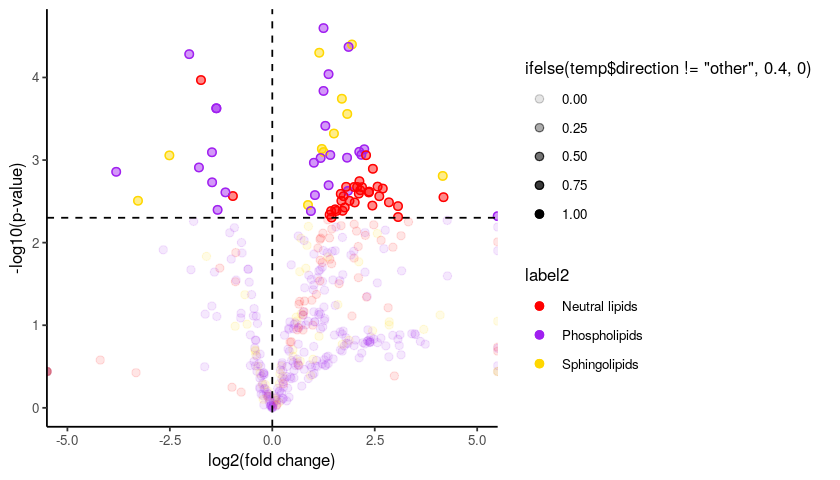

In [695]:
options(repr.plot.width =7, repr.plot.height = 4)

#pdf('../pdf_figures/major_class_lipid_in.pdf', width=7, height=4)
plot_volcano(data$ngn2_all, 'logfc_both_batch', 'pvals_both_batch',  0.005, 0, FALSE, 'Class', cols) + xlim(-5,5) + geom_hline(yintercept=-log10(0.005),  linetype='dashed')+ geom_vline(xintercept=0, linetype='dashed')
#dev.off()

In [723]:
# library(reshape2)
# melt(df2, )

In [10]:
T = df[, 1:31]/df$total
T$Genotype = df$Genotype
T[,'PC:TG'] = T$PC/T$TG
T[,'CL:TG'] = T$CL/T$TG

T[,'MG:TG'] = T$MG/T$TG
T[,'LPC:PC'] = T$LPC/T$PC

In [11]:
library(reshape2)


Warning message:
“package ‘reshape2’ was built under R version 3.6.3”

In [13]:
mean((df$DG/df$total)[(df$Genotype=='ABCA7 LoF') & (df$treatment!='Choline')])/mean((df$DG/df$total)[(df$Genotype=='Control') & (df$treatment!='Choline')])

[1] 1.101482

In [34]:
1- (mean((df$MG/df$total)[(df$Genotype=='ABCA7 LoF') & (df$treatment!='Choline')])/mean((df$MG/df$total)[(df$Genotype=='Control') & (df$treatment!='Choline')]))

[1] 0.8078442

In [32]:
1-(mean((df$PC/df$total)[(df$Genotype=='ABCA7 LoF') & (df$treatment!='Choline')])/mean((df$PC/df$total)[(df$Genotype=='Control') & (df$treatment!='Choline')]))

[1] 0.3619876

In [24]:
log2(mean((df$DG/df$total)[(df$Genotype=='ABCA7 LoF') & (df$treatment!='Choline')])/mean((df$DG/df$total)[(df$Genotype=='Control') & (df$treatment!='Choline')]))

[1] 0.1394461

In [25]:
log2(mean((df$TG/df$total)[(df$Genotype=='ABCA7 LoF') & (df$treatment!='Choline')])/mean((df$TG/df$total)[(df$Genotype=='Control') & (df$treatment!='Choline')]))

[1] 0.859395

In [20]:
log2(mean((df$TG/df$total)[(df$Genotype=='ABCA7 LoF') & (df$treatment!='Choline')])/mean((df$TG/df$total)[(df$Genotype=='Control') & (df$treatment!='Choline')]))

[1] 0.859395

In [19]:
mean((df$TG/df$total)[(df$Genotype=='Control') & (df$treatment!='Choline')]) + (0.8*mean((df$TG/df$total)[(df$Genotype=='Control') & (df$treatment!='Choline')]))

[1] 0.508061

In [18]:
mean((df$TG/df$total)[(df$Genotype=='ABCA7 LoF') & (df$treatment!='Choline')])

[1] 0.5120908

In [18]:
x = melt(T)
x = x[as.character(x$variable)%in%c('DG', 'PC', 'TG'),]

options(repr.plot.width = 10, repr.plot.height = 2.5)

cols = c('grey', 'blue')
names(cols) = c('Control', 'ABCA7 LoF')
x$Genotype = factor(x$Genotype, levels=c('Control', 'ABCA7 LoF'))

pdf('../pdf_figures/ratios_iN3.pdf', width=5, height = 2.5)
ggplot(x, aes(x = Genotype, y = value)) +
  geom_boxplot(aes(color=Genotype, fill=Genotype, alpha=.5)) +
  labs(x = "", y = "sum subclass/total", title = "") +
  theme_classic() + geom_jitter(aes(color=Genotype), width=.1) + scale_y_continuous(limits = c(0, NA)) + geom_signif(comparisons = list(c("Control", "ABCA7 LoF")), textsize = 3, test = "t.test", map_signif_level = F) + scale_fill_manual(values = cols)  + scale_color_manual(values = cols) + facet_wrap(~variable, nrow=1, scales = "free") +   theme(
    axis.text.x = element_blank(),  # Remove x-axis labels
    axis.ticks.x = element_blank() , strip.background = element_rect(fill = "white", color = NA)) + coord_cartesian(clip = "off")
dev.off()
# Remove x-axis ticks

#+ ylim(c(0,1.5e+13))

Using Genotype as id variables


png 
  2

In [841]:
x = melt(T)
x = x[as.character(x$variable)%in%c('PC:TG', 'MG:TG', 'LPC:PC'),]

options(repr.plot.width = 5, repr.plot.height = 2.5)

cols = c('grey', 'blue')
names(cols) = c('Control', 'ABCA7 LoF')
x$Genotype = factor(x$Genotype, levels=c('Control', 'ABCA7 LoF'))
pdf('../pdf_figures/ratios2_iN.pdf', width=5, height = 2.5)

ggplot(x, aes(x = Genotype, y = value)) +
  geom_boxplot(aes(color=Genotype, fill=Genotype, alpha=.5)) +
  labs(x = "", y = "Ratio subclass # 1 / subclass #2", title = "") +
  theme_classic() + geom_jitter(aes(color=Genotype), width=.1) + scale_y_continuous(limits = c(0, NA)) + geom_signif(comparisons = list(c("Control", "ABCA7 LoF")), textsize = 3, test = "t.test", map_signif_level = F) + scale_fill_manual(values = cols)  + scale_color_manual(values = cols) + facet_wrap(~variable, nrow=1, scales = "free") +   theme(
    axis.text.x = element_blank(),  # Remove x-axis labels
    axis.ticks.x = element_blank() , strip.background = element_rect(fill = "white", color = NA)) 

dev.off()
# Remove x-axis ticks
#+ ylim(c(0,1.5e+13))

Using Genotype as id variables


png 
  2

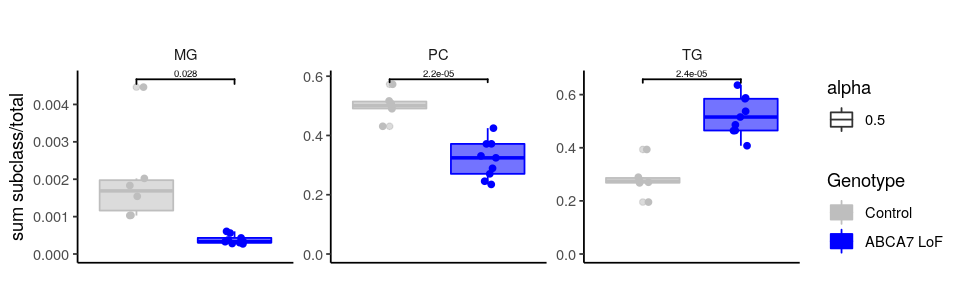

In [ ]:
, 'PC_TG', 'MG_TG', 'LPC_P'

In [789]:
species = colnames(df)[1:31]
pvals = c()
logfcs = c()
for( i in species){
    x = t.test(df[df$Genotype=='Control',i]/df[df$Genotype=='Control','total'], df[df$Genotype=='ABCA7 LoF',i]/ df[df$Genotype=='ABCA7 LoF','total'])
    pval = x$p.value
    temp = x$estimate
    logfc = unname(log2(temp['mean of y'] / temp['mean of x']))
    pvals = c(pvals,pval)
    logfcs = c(logfcs,logfc)
}

In [790]:
f = as.data.frame(cbind(species, as.numeric(logfcs), as.numeric(pvals)))
f$padjust = p.adjust(pvals, 'fdr')
f = f[order(as.numeric(pvals)),]

In [791]:
d = cbind(f, key[as.character(f$species),])

In [774]:
sp = d[d$padjust<0.05,]

In [792]:
d

,species,V2,V3,padjust,Key,Class,subclass
,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>
28,StE,1.30539630512375,5.5377577723469e-07,1.716705e-05,StE,Neutral lipids,Stigmasterol Ester
17,PC,-0.657880842128894,2.15285668966512e-05,2.429375e-04,PC,Phospholipids,phosphatidylcholine
29,TG,0.882708513864239,2.35100792611683e-05,2.429375e-04,TG,Neutral lipids,triglyceride
31,ZyE,0.948684197277673,4.51636698047361e-05,3.500184e-04,ZyE,Neutral lipids,Zymosterol Ester
23,PS,-0.918313393246813,7.2259954125474e-05,4.480117e-04,PS,Phospholipids,phosphatidylserine
15,MLCL,-0.843301347360323,0.00135169022119719,6.983733e-03,MLCL,Phospholipids,Cardiolipin
16,PA,-0.788527630562396,0.00295431552203222,1.308340e-02,PA,Phospholipids,phosphatidic acid
26,SQDG,-1.07827886452386,0.00494790832883846,1.917314e-02,SQDG,Glycoglycerolipids,Sulfoquinovosyldiacylglycerol
19,PEt,-0.739290961298456,0.00656972668649051,2.262906e-02,PEt,Fatty acyl and other lipids,phosphatidylethanol


[1] 1.000000e+00 3.710931e-01 1.000000e+00 1.000000e+00 2.323987e-01
 [6] 4.622073e-01 1.000000e+00 1.000000e+00 1.000000e+00 7.798652e-01
[11] 1.000000e+00 4.039986e-01 4.622073e-01 3.479024e-01 3.514395e-02
[16] 7.385789e-02 6.458570e-04 1.000000e+00 1.511037e-01 7.353301e-01
[21] 1.000000e+00 1.737981e-01 1.951019e-03 1.000000e+00 1.000000e+00
[26] 1.187498e-01 1.000000e+00 1.716705e-05 6.817923e-04 1.000000e+00
[31] 1.264583e-03

In [746]:
order(pvals)

[1] 28 17 29 31 23 15 16 26 19 22  5 14  2 12  6 13 20 10  1  9  4 30  7 27  8
[26] 11 24 25 18 21  3

In [441]:
ranked_data <- meta %>%
  group_by(class) %>%
  mutate(
    Rank = rank(logfc_both_batch),  # Rank within each class
    MaxRank = max(Rank),            # Get the maximum rank within each class
    NormalizedRank = Rank / MaxRank # Normalize ranks so the max rank in each class is 1
  ) %>%
  select(-MaxRank)

In [488]:
meta +
  stat_density(
    aes(fill = after_stat(logfc_both_batch)),
    geom = "raster",
    position = "identity"
  )

Warning message in eval(expr, envir, enclos):
“Incompatible methods ("Ops.data.frame", "+.gg") for "+"”

ERROR: Error in meta + stat_density(aes(fill = after_stat(logfc_both_batch)), : non-numeric argument to binary operator


In [566]:
library(ggplot2)

options(repr.plot.width =5, repr.plot.height = 4)

ranked_data <- meta %>%
  group_by(class) %>%
  mutate(
    Rank = rank(logfc_both_batch),  # Rank within each class
    MaxRank = max(Rank),            # Get the maximum rank within each class
    NormalizedRank = Rank / MaxRank # Normalize ranks so the max rank in each class is 1
  ) %>%
  select(-MaxRank)

ranked_data = ranked_data[abs(ranked_data$logfc_both_batch)!=Inf,]
# Create the plot
x = ggplot(as.data.frame(ranked_data)[ranked_data$class=='Neutral lipids',], aes(x = 1, y = as.numeric(NormalizedRank))) +
  geom_tile(aes(fill = as.numeric(logfc_both_batch)))+scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0,  # Ensure this midpoint makes sense for your data range
                       limits = c(-5, 5),  # Ensure limits are appropriate for your data
                       name = "logFC") #+    facet_wrap(~ class, scales = "free") 

y = ggplot(as.data.frame(ranked_data)[ranked_data$class=='Phospholipids',], aes(x = 1, y = as.numeric(NormalizedRank))) +
  geom_tile(aes(fill = as.numeric(logfc_both_batch)))+scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0,  # Ensure this midpoint makes sense for your data range
                       limits = c(-5, 5),  # Ensure limits are appropriate for your data
                       name = "logFC") #+    facet_wrap(~ class, scales = "free") 

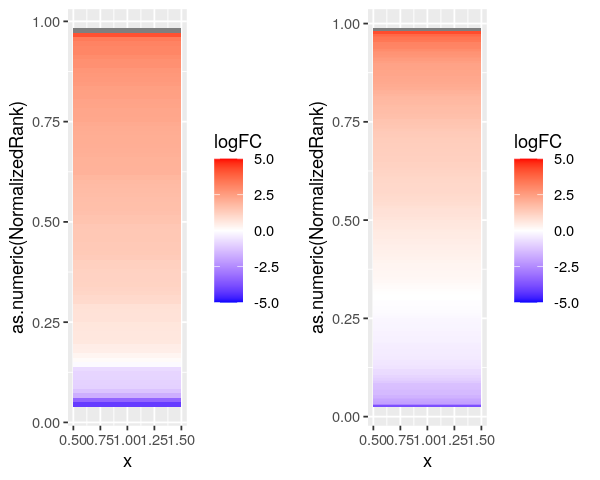

In [567]:
library(cowplot)

# Use plot_grid to arrange plots
plot_grid(x, y, ncol = 2, align = 'h')

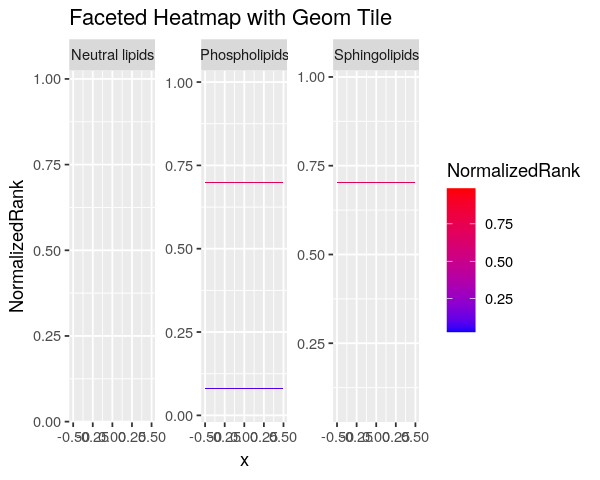

In [561]:
# Example data
data <- expand.grid(
  X = 1:10,
  Y = 1:10,
  Category = c("A", "B", "C")
)
data$Value <- runif(nrow(data))  # Random values for demonstration

# Creating the plot
p <- ggplot(ranked_data, aes(x = 0, y = NormalizedRank, fill = NormalizedRank)) +
  geom_tile() +
  facet_wrap(~ class, scales = "free") +
  scale_fill_gradient(low = "blue", high = "red") +
  labs(title = "Faceted Heatmap with Geom Tile")

# Print the plot
print(p)

In [534]:
library(patchwork)

ERROR: Error in library(patchwork): there is no package called ‘patchwork’


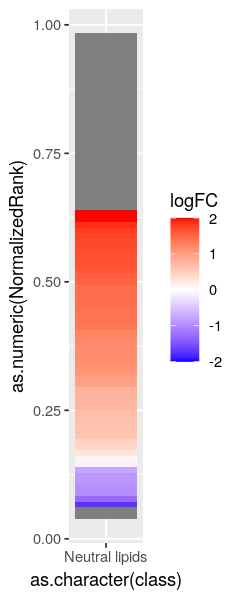

In [522]:
library(ggplot2)

options(repr.plot.width =2, repr.plot.height = 5)

ranked_data <- meta %>%
  group_by(class) %>%
  mutate(
    Rank = rank(logfc_both_batch),  # Rank within each class
    MaxRank = max(Rank),            # Get the maximum rank within each class
    NormalizedRank = Rank / MaxRank # Normalize ranks so the max rank in each class is 1
  ) %>%
  select(-MaxRank)

ranked_data = ranked_data[abs(ranked_data$logfc_both_batch)!=Inf,]
# Create the plot
ggplot(as.data.frame(ranked_data[ranked_data$class=='Neutral lipids',]), aes(x = as.character(class), y = as.numeric(NormalizedRank))) +
  geom_tile(aes(fill = as.numeric(logfc_both_batch)))+scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0,  # Ensure this midpoint makes sense for your data range
                       limits = c(-2, 2),  # Ensure limits are appropriate for your data
                       name = "logFC") 

In [499]:
max(ranked_data$logfc_both_batch)

[1] 8.273785

In [487]:
sum(ranked_data[ranked_data$class=='Sphingolipids',]['NormalizedRank'])

[1] 28.75676

In [480]:
ranked_data

lipid.name,lipid.ret_time,lipid.rej.,lipid.lipidion,lipid.lipidgroup,lipid.class,lipid.fattyacid,lipid.fa1,lipid.fa2,lipid.fa3,⋯,min_length,pvals_both_batch,logfc_both_batch,score_both_batch,change,class,class2,rank,Rank,NormalizedRank
<chr>,<dbl>,<int>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
Cer(d15:0_26:2)-H_47.3,47.30,0,Cer(d15:0_26:2)-H,Cer(d41:2)-H,Cer,(d15:0_26:2),(d15:0),(26:2),,⋯,15,0.0973728619,-0.61254527,-1.01156207,unchanged,Sphingolipids,NA,52,9,0.16216216
Cer(d17:1_16:0)-H_42.85,42.85,0,Cer(d17:1_16:0)-H,Cer(d33:1)-H,Cer,(d17:1_16:0),(d17:1),(16:0),,⋯,16,0.5242817736,-0.24207597,-0.28043524,unchanged,Sphingolipids,NA,83,15,0.27027027
Cer(d18:0_16:0)+H_35.41,35.41,0,Cer(d18:0_16:0)+H,Cer(d34:0)+H,Cer,(d18:0_16:0),(d18:0),(16:0),,⋯,16,0.4126783541,0.25659144,0.38438831,unchanged,Sphingolipids,NA,138,26,0.46846847
Cer(d18:0_18:0)+H_44.03,44.03,0,Cer(d18:0_18:0)+H,Cer(d36:0)+H,Cer,(d18:0_18:0),(d18:0),(18:0),,⋯,18,0.0170292406,2.10961830,1.76880472,unchanged,Sphingolipids,NA,326,47,0.84684685
Cer(d18:0_18:0)-H_45.32,45.32,0,Cer(d18:0_18:0)-H,Cer(d36:0)-H,Cer,(d18:0_18:0),(d18:0),(18:0),,⋯,18,0.0204415248,0.81762372,1.68948671,unchanged,Sphingolipids,NA,199,35,0.63063063
Cer(d18:1_14:0)+H_40.51,40.51,0,Cer(d18:1_14:0)+H,Cer(d32:1)+H,Cer,(d18:1_14:0),(d18:1),(14:0),,⋯,14,0.0031078308,-3.27763226,-2.50754264,down,Sphingolipids,NA,16,4,0.07207207
Cer(d18:1_14:0)-H_42.04,42.04,0,Cer(d18:1_14:0)-H,Cer(d32:1)-H,Cer,(d18:1_14:0),(d18:1),(14:0),,⋯,14,0.0146802184,-1.60606558,-1.83326748,unchanged,Sphingolipids,NA,26,6,0.10810811
Cer(d18:1_16:0)+H-H2O_42.06,42.06,0,Cer(d18:1_16:0)+H-H2O,Cer(d34:1)+H-H2O,Cer,(d18:1_16:0),(d18:1),(16:0),,⋯,16,0.2280546743,-0.40745504,-0.64196102,unchanged,Sphingolipids,NA,67,12,0.21621622
Cer(d18:1_16:0)+H_42.06,42.06,0,Cer(d18:1_16:0)+H,Cer(d34:1)+H,Cer,(d18:1_16:0),(d18:1),(16:0),,⋯,16,0.2053584034,-0.41172850,-0.68748752,unchanged,Sphingolipids,NA,65,11,0.19819820


In [478]:
ranked_data$logfc_both_batch

[1] -0.6125452743 -0.2420759659  0.2565914356  2.1096183036  0.8176237169
  [6] -3.2776322601 -1.6060655806 -0.4074550376 -0.4117285021 -0.3554988043
 [11] -0.9056663139  0.5073087212  0.5010877364  0.0872245456 -0.4207971253
 [16]  0.5976186213  0.6681253021 -0.1711540289  0.7067790592  0.5841566127
 [21]  0.7010080429  0.1870894299  0.8711640551  0.1738977943  0.0586693821
 [26]  0.2183102861 -0.0981519671 -2.5111844548 -0.6693856075 -0.2999888591
 [31]  1.8293448363  1.2093372318          -Inf  1.5985407866  0.0717756292
 [36]  2.5641933497  1.1410115321  2.8553951888  2.4466989718  1.8733395456
 [41]  0.7864083841  0.9879417960  0.6320041802  0.6516274328  0.6352171479
 [46]  0.6668617881  0.7471637671  0.3853677307          -Inf -0.2322669535
 [51]  2.3300752869  1.8081819316  0.4085488810  0.2997196069  3.0988860022
 [56]  0.4628672882  1.2183582660  1.7049769060  1.7971997057  1.3176463674
 [61]  1.1795637645  1.7558510550 -0.3018989676           Inf -1.6508297347
 [66]  1.1765183288  0.9180377940  0.2717516722  0.0008803085 -0.0442968128
 [71]  5.1813222439  0.6102927556  1.6290563886  0.9632776446 -0.8905207976
 [76]  2.8277692943           Inf  2.1021879189           Inf  1.6783628263
 [81]  1.2209873195  1.0767968857  1.4465765641 -0.8980886497  1.9958194129
 [86]  0.2718892480  0.4343703362 -0.1077716856          -Inf  0.8817665730
 [91]  0.1629819671  0.8463618031  3.6959388419  4.0954495565  1.1467298929
 [96]  2.8524708035  1.2599456977  1.4794488439  1.9188950492          -Inf
[101]          -Inf          -Inf -0.9616408118 -1.2821074156 -4.1982897258
[106] -1.7406192114  0.8767253917  0.6498078460  0.5155724053  0.0120415325
[111]  0.6187619429 -0.2331988908  0.2991362038 -0.4098555312  2.1233436543
[116]  0.1716577208 -0.4015330405  0.1780354383 -0.0402901590  0.6460319825
[121]  1.4617059165  3.7334410852  1.2639302420  3.1418807237 -1.3347951311
[126]           Inf  2.7231669855 -0.8833999516  0.5310974755 -0.3065643578
[131] -1.4118803923  1.0116494238  1.3727690956 -0.1131657149 -0.3014249834
[136] -0.0804873434  4.2691537879  0.6352503590 -0.4612726440  0.4027009937
[141]  1.7195453919  1.2740337951  1.0405078394  0.7902772912  1.8250719362
[146]  1.8466818488 -0.1799539944  2.5643146464  1.2498737259  1.8613934051
[151]  1.2500927232  0.3579542647  1.0796203631  0.2547155273  0.4410127263
[156]  0.2296448616 -0.5346653072  1.3381404004 -1.1431167935 -0.4118642856
[161] -0.3794667398  2.1824430406  1.6476981107  1.2218186009  1.3742325054
[166]  0.6075731163  2.2446984845          -Inf -0.7373992715  0.0139625929
[171]  1.2471714433  0.4168799164 -0.0211929533  0.9548964485  2.1732601372
[176] -1.4724504148 -0.0037449170 -0.2825096641  1.5535071724 -1.7900334503
[181] -0.0576804632  1.1667640948  2.9388089134 -3.8091346884 -1.9851790813
[186]  0.7567730754  1.9863905551 -0.3235516788  1.9956267004 -1.9196741830
[191] -0.2087962812 -2.6597538499  1.0144049456  2.2633607829 -0.1326270993
[196]  0.2374543473  1.2243481203  1.6632605091  1.2947185528 -0.3747763930
[201] -0.5325326632  2.7587731281  1.3661079782  1.7116758196 -0.0729378326
[206]  1.5353869821  0.5304237847  0.8900247727  2.2626333686  0.9421732380
[211]  0.6345576341  0.7775483786  0.1299720520 -0.2708925233 -0.7727326672
[216]  0.1124264625  0.0958719369  0.7568108066 -0.2660518935  4.2740983722
[221]  1.1339448323  1.1037511315  1.0166212138 -0.1446617904 -0.5056050704
[226]  1.1437348622 -0.5895294121  0.4709204702  0.4006255274 -1.3628560441
[231] -0.2000332203 -0.7608982326  0.0047817410  1.0002976513  0.7747609405
[236]  0.3534577109  0.5186172632 -0.4478486484  1.0150078605 -1.4750952373
[241]  3.1552694785 -1.4683940983 -0.9249063450 -1.0007159817 -0.2156155771
[246] -1.0397438465 -2.0269750093  2.3152377832  1.0109129434  1.0373381708
[251]  0.4603087560  1.2701329193  1.3094600465  3.0646499148  3.6144746734
[256]  2.4789112659  3.1153152670  3.4033933642  2.3852889762  2.3257899746
[261]  1.8416707205  3.4769360035  1.5165418007  2

In [466]:
ranked_data$NormalizedRank

[1] 0.16216216 0.27027027 0.46846847 0.84684685 0.63063063 0.07207207
  [7] 0.10810811 0.21621622 0.19819820 0.23423423 0.12612613 0.50450450
 [13] 0.48648649 0.37837838 0.18018018 0.54054054 0.55855856 0.30630631
 [19] 0.61261261 0.52252252 0.59459459 0.43243243 0.66666667 0.41441441
 [25] 0.34234234 0.45045045 0.32432432 0.09009009 0.14414414 0.25225225
 [31] 0.81081081 0.75675676 0.03603604 0.77477477 0.36036036 0.88288288
 [37] 0.72072072 0.91891892 0.86486486 0.82882883 0.28888889 0.31111111
 [43] 0.21111111 0.23333333 0.22222222 0.24444444 0.25555556 0.41458733
 [49] 0.01343570 0.22264875 0.87523992 0.79846449 0.42610365 0.39539347
 [55] 0.94049904 0.44529750 0.64875240 0.77159309 0.79462572 0.70633397
 [61] 0.64491363 0.79078695 0.19577735 1.00000000 0.04990403 0.64107486
 [67] 0.54894434 0.38387716 0.30326296 0.28406910 0.97777778 0.20000000
 [73] 0.52222222 0.30000000 0.12222222 0.88888889 1.00000000 0.70000000
 [79] 1.00000000 0.54444444 0.38888889 0.32222222 0.46666667 0.11111111
 [85] 0.63333333 0.16666667 0.17777778 0.14444444 0.01343570 0.68468468
 [91] 0.39639640 0.64864865 0.93693694 0.95495495 0.73873874 0.90090090
 [97] 0.67562380 0.73704415 0.81765835 0.02222222 0.02222222 0.02222222
[103] 0.10000000 0.07777778 0.04444444 0.06666667 0.53742802 0.49904031
[109] 0.45297505 0.31094050 0.48368522 0.21880998 0.39155470 0.16506718
[115] 0.83685221 0.34165067 0.16890595 0.34548944 0.28790787 0.49520154
[121] 0.73320537 0.97120921 0.67946257 0.94817658 0.08445298 1.00000000
[127] 0.91746641 0.10364683 0.46833013 0.19193858 0.06909789 0.57581574
[133] 0.72168906 0.26103647 0.19961612 0.26871401 0.97504798 0.49136276
[139] 0.14587332 0.42226488 0.78310940 0.68714012 0.60268714 0.52975048
[145] 0.80230326 0.80998081 0.24952015 0.90595010 0.66794626 0.81381958
[151] 0.67178503 0.40690979 0.61036468 0.37619962 0.43761996 0.36084453
[157] 0.13435701 0.71017274 0.08829175 0.16122841 0.17658349 0.84452975
[163] 0.76007678 0.65259117 0.72552783 0.47984645 0.85220729 0.01343570
[169] 0.11900192 0.31477927 0.66410749 0.42994242 0.29558541 0.55662188
[175] 0.84069098 0.06142035 0.29942418 0.20729367 0.75623800 0.04606526
[181] 0.28023033 0.63339731 0.93282150 0.02687140 0.03838772 0.51055662
[187] 0.82149712 0.18809981 0.82533589 0.04222649 0.23416507 0.03071017
[193] 0.57965451 0.86372361 0.25719770 0.36468330 0.65642994 0.76775432
[199] 0.69865643 0.18042226 0.13819578 0.92130518 0.71785029 0.77927063
[205] 0.27255278 0.74856046 0.46449136 0.54510557 0.85988484 0.55278311
[211] 0.48752399 0.52207294 0.33781190 0.21113244 0.10748560 0.33397313
[217] 0.33013436 0.51439539 0.21497121 0.97888676 0.62571977 0.61420345
[223] 0.58733205 0.25335893 0.14203455 0.62955854 0.12667946 0.44913628
[229] 0.41842610 0.07677543 0.24184261 0.11132438 0.30710173 0.56813820
[235] 0.51823417 0.40307102 0.45681382 0.14971209 0.58349328 0.05758157
[241] 0.95201536 0.06525912 0.09980806 0.09596929 0.22648752 0.09213052
[247] 0.03454894 0.86756238 0.57197697 0.59884837 0.44145873 0.68330134
[253] 0.70249520 0.93666027 0.96737044 0.90211132 0.94433781 0.95585413
[259] 0.89059501 0.87140115 0.80614203 0.95969290 0.74472169 0.88675624
[265] 0.38771593 1.00000000 0.61804223 0.77543186 0.52591171 0.92898273
[271] 0.35316699 1.00000000 0.89827255 0.54126679 0.83301344 0.74088292
[277] 0.15738964 0.87907869 0.98272553 0.82917466 0.78694818 0.84836852
[283] 0.39923225 0.96353167 0.92514395 0.89443378 0.90978887 0.91362764
[289] 0.85604607 0.88291747 0.71401152 0.60652591 0.50671785 0.29174664
[295] 0.01343570 0.62188100 0.37236084 0.76391555 0.75239923 0.59500960
[301] 0.47600768 0.69097889 0.72936660 0.05374280 1.00000000 1.00000000
[307] 0.46065259 0.20345489 0.01343570 0.01343570 0.41074856 0.53358925
[313] 0.66026871 0.50287908 0.69481766 0.56429942 0.63723608 0.35700576
[319] 0.47216891 0.38003839 0.56046065 0.59117083 0.23800384 0.98656430
[325] 0.36852207 0.11516315 0.17274472 0.23032630 0.18426104 0.32629559
[331] 0.27639155 0.34932821 0.08061420 0.1

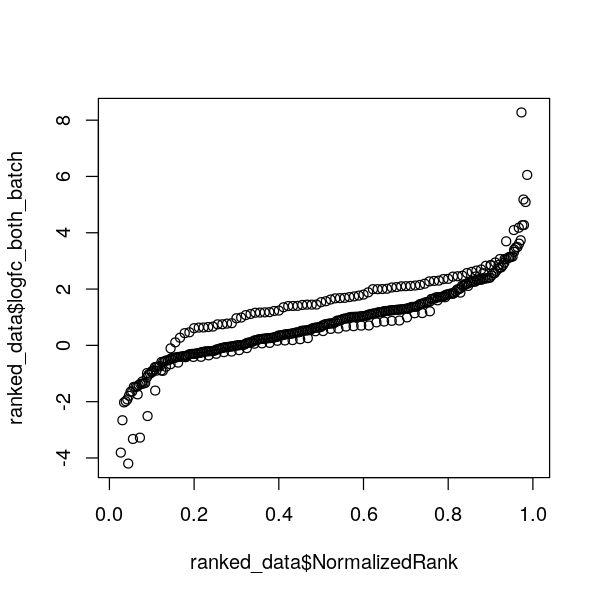

In [452]:
plot(ranked_data$NormalizedRank, ranked_data$logfc_both_batch)

In [417]:
meta

,lipid.name,lipid.ret_time,lipid.rej.,lipid.lipidion,lipid.lipidgroup,lipid.class,lipid.fattyacid,lipid.fa1,lipid.fa2,lipid.fa3,⋯,merge_index,max_length,min_length,pvals_both_batch,logfc_both_batch,score_both_batch,change,class,class2,rank
,<chr>,<dbl>,<int>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
Cer(d15:0_26:2)-H_47.3,Cer(d15:0_26:2)-H_47.3,47.30,0,Cer(d15:0_26:2)-H,Cer(d41:2)-H,Cer,(d15:0_26:2),(d15:0),(26:2),,⋯,Cer_41_2,26,15,0.0973728619,-0.61254527,-1.01156207,unchanged,Sphingolipids,NA,52
Cer(d17:1_16:0)-H_42.85,Cer(d17:1_16:0)-H_42.85,42.85,0,Cer(d17:1_16:0)-H,Cer(d33:1)-H,Cer,(d17:1_16:0),(d17:1),(16:0),,⋯,Cer_33_1,17,16,0.5242817736,-0.24207597,-0.28043524,unchanged,Sphingolipids,NA,83
Cer(d18:0_16:0)+H_35.41,Cer(d18:0_16:0)+H_35.41,35.41,0,Cer(d18:0_16:0)+H,Cer(d34:0)+H,Cer,(d18:0_16:0),(d18:0),(16:0),,⋯,Cer_34_0,18,16,0.4126783541,0.25659144,0.38438831,unchanged,Sphingolipids,NA,138
Cer(d18:0_18:0)+H_44.03,Cer(d18:0_18:0)+H_44.03,44.03,0,Cer(d18:0_18:0)+H,Cer(d36:0)+H,Cer,(d18:0_18:0),(d18:0),(18:0),,⋯,Cer_36_0,18,18,0.0170292406,2.10961830,1.76880472,unchanged,Sphingolipids,NA,326
Cer(d18:0_18:0)-H_45.32,Cer(d18:0_18:0)-H_45.32,45.32,0,Cer(d18:0_18:0)-H,Cer(d36:0)-H,Cer,(d18:0_18:0),(d18:0),(18:0),,⋯,Cer_36_0,18,18,0.0204415248,0.81762372,1.68948671,unchanged,Sphingolipids,NA,199
Cer(d18:1_14:0)+H_40.51,Cer(d18:1_14:0)+H_40.51,40.51,0,Cer(d18:1_14:0)+H,Cer(d32:1)+H,Cer,(d18:1_14:0),(d18:1),(14:0),,⋯,Cer_32_1,18,14,0.0031078308,-3.27763226,-2.50754264,down,Sphingolipids,NA,16
Cer(d18:1_14:0)-H_42.04,Cer(d18:1_14:0)-H_42.04,42.04,0,Cer(d18:1_14:0)-H,Cer(d32:1)-H,Cer,(d18:1_14:0),(d18:1),(14:0),,⋯,Cer_32_1,18,14,0.0146802184,-1.60606558,-1.83326748,unchanged,Sphingolipids,NA,26
Cer(d18:1_16:0)+H-H2O_42.06,Cer(d18:1_16:0)+H-H2O_42.06,42.06,0,Cer(d18:1_16:0)+H-H2O,Cer(d34:1)+H-H2O,Cer,(d18:1_16:0),(d18:1),(16:0),,⋯,Cer_34_1,18,16,0.2280546743,-0.40745504,-0.64196102,unchanged,Sphingolipids,NA,67
Cer(d18:1_16:0)+H_42.06,Cer(d18:1_16:0)+H_42.06,42.06,0,Cer(d18:1_16:0)+H,Cer(d34:1)+H,Cer,(d18:1_16:0),(d18:1),(16:0),,⋯,Cer_34_1,18,16,0.2053584034,-0.41172850,-0.68748752,unchanged,Sphingolipids,NA,65


In [43]:
species = colnames(df)[1:49]
pvals = c()
logfcs = c()
for( i in species){
    x = t.test(df[df$genotype=='CON',i]/df[df$genotype=='CON','total'], df[df$genotype=='LOF',i]/ df[df$genotype=='LOF','total'])
    pval = x$p.value
    temp = x$estimate
    logfc = unname(log2(temp['mean of y'] / temp['mean of x']))
    pvals = c(pvals,pval)
    logfcs = c(logfcs,logfc)
}

In [66]:
x = rowData(d)
as.data.frame(x[x$stats.pvalue<0.05,c('lipid.name', 'stats.log2')])

,lipid.name,stats.log2
,<chr>,<dbl>
Cer(m17:1_19:1)-H_41.89,Cer(m17:1_19:1)-H_41.89,0.9376032
CL(70:2)-2H_38.27,CL(70:2)-2H_38.27,-0.8272278
CL(72:3)-2H_25.52,CL(72:3)-2H_25.52,-1.0163555
CL(72:4)-2H_37.07,CL(72:4)-2H_37.07,-0.7456706
CL(74:4)-2H_38.22,CL(74:4)-2H_38.22,-1.0178387
CL(74:5)-2H_38.31,CL(74:5)-2H_38.31,-0.5030937
CL(76:9)-2H_25.59,CL(76:9)-2H_25.59,-0.8350254
FA(20:5)-H_13.41,FA(20:5)-H_13.41,-0.5450292
Hex1Cer(d18:1_26:0+O)+H_40.28,Hex1Cer(d18:1_26:0+O)+H_40.28,-0.2842451


In [64]:
x

DataFrame with 1463 rows and 26 columns
                           lipid.name lipid.lipidion   lipid.key
                          <character>    <character> <character>
AcCa(10:0)+H_19.68 AcCa(10:0)+H_19.68   AcCa(10:0)+H        AcCa
AcCa(10:1)+H_16.59 AcCa(10:1)+H_16.59   AcCa(10:1)+H        AcCa
AcCa(12:0)+H_23.81 AcCa(12:0)+H_23.81   AcCa(12:0)+H        AcCa
AcCa(12:1)+H_21.48 AcCa(12:1)+H_21.48   AcCa(12:1)+H        AcCa
AcCa(13:0)+H_25.81 AcCa(13:0)+H_25.81   AcCa(13:0)+H        AcCa
...                               ...            ...         ...
ZyE(0:0)+H_30.35     ZyE(0:0)+H_30.35     ZyE(0:0)+H         ZyE
ZyE(0:0)+H_39.2       ZyE(0:0)+H_39.2     ZyE(0:0)+H         ZyE
ZyE(0:0)+H_42.82     ZyE(0:0)+H_42.82     ZyE(0:0)+H         ZyE
ZyE(22:0)+H_32.7     ZyE(22:0)+H_32.7    ZyE(22:0)+H         ZyE
ZyE(24:7)+H_44.38   ZyE(24:7)+H_44.38    ZyE(24:7)+H         ZyE
                                   lipid.Class   lipid.Subclass lipid.fattyacid
                                   

mean of x   mean of y 
48027500000 50114250000

[1] 0.8255104

Warning message in grid.Call.graphics(C_rect, x$x, x$y, x$width, x$height, resolveHJust(x$just, :
“supplied color is neither numeric nor character”

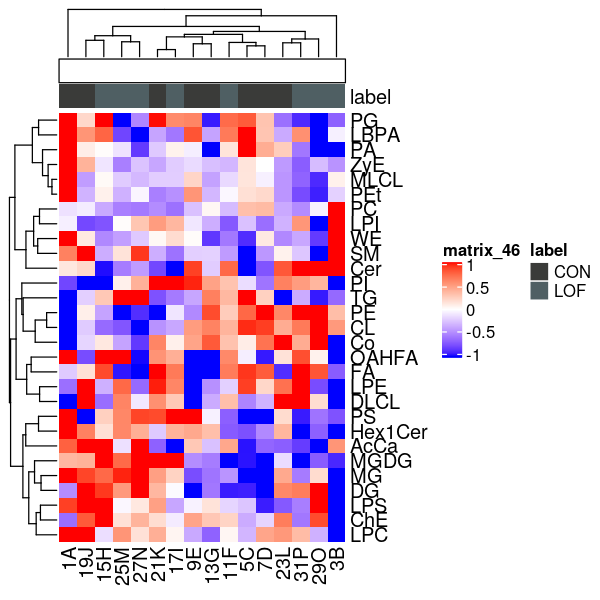

In [203]:
options(repr.plot.width = 5, repr.plot.height = 5)


category_colors <- list('CON' = "blue", 'LOF' = "red")

row_annotation <- columnAnnotation(foo = anno_block(gp = gpar(fill = category_colors[as.character(df$genotype)])), label=as.character(df$genotype))

library(ComplexHeatmap)
library(circlize)
temp = df[,1:49]/df$total

Heatmap(t(scale((temp[,colMeans(temp)>0.001]
))),top_annotation = c(row_annotation),        col = colorRamp2(c(-1, 0, 1), c("blue", "white", "red")))

In [204]:
head(df)

,AcCa,AcHexChE,AEA,CarE,Cer,CerG3GNAc1,ChE,CL,Co,cPA,⋯,SPH,SPHP,SQDG,ST,StE,TG,WE,ZyE,genotype,total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1A,6.2300e+10,3e+08,9.10e+09,7.0e+07,386842200000,8.56e+09,4.0020e+11,3.52151e+11,1.2e+10,2e+08,⋯,8.100e+09,0e+00,4.401e+09,1.0e+08,5e+08,87894000000,5.650e+10,4.4900e+10,CON,1.250676e+13
5C,3.1270e+10,4e+07,6.07e+09,1.0e+08,228500000000,7.30e+09,4.1020e+11,5.36492e+11,5.7e+10,2e+08,⋯,5.080e+09,7e+06,8.740e+08,2.4e+08,2e+08,682171000000,1.200e+08,1.3900e+10,CON,1.211328e+13
7D,3.6670e+10,5e+07,9.90e+09,1.0e+08,302010000000,6.30e+09,4.2890e+11,5.38716e+11,6.9e+10,2e+08,⋯,8.300e+09,0e+00,1.730e+09,6.0e+08,1e+08,411700600000,1.615e+10,1.2820e+10,CON,1.222214e+13
9E,5.5391e+10,1e+08,7.70e+09,3.6e+08,468780000000,6.69e+09,5.0900e+11,5.44110e+11,6.8e+10,5e+08,⋯,6.720e+09,9e+07,2.170e+09,4.0e+08,2e+08,314180000000,1.540e+10,1.2110e+10,CON,1.285725e+13
13G,4.6470e+10,8e+07,6.41e+09,2.5e+08,372950000000,4.40e+09,5.0240e+11,5.61390e+11,7.6e+10,1e+08,⋯,5.150e+09,0e+00,1.267e+09,2.0e+08,5e+08,519490000000,8.000e+08,1.1200e+10,CON,1.309803e+13
19J,7.4652e+10,1e+08,8.53e+09,6.0e+08,381990000000,4.30e+09,5.0834e+11,4.73250e+11,5.2e+10,8e+08,⋯,6.476e+09,2e+06,2.070e+09,2.0e+08,2e+08,328610000000,1.608e+10,1.6104e+10,CON,1.212852e+13


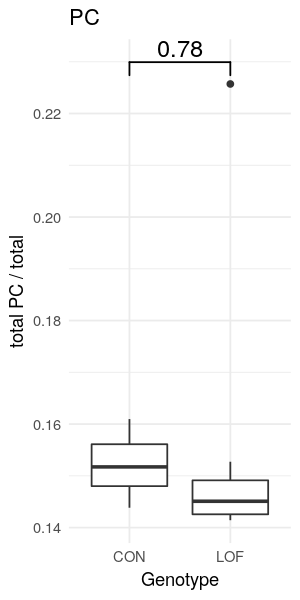

In [217]:
options(repr.plot.width = 2.5, repr.plot.height = 5)

ggplot(df, aes(x = genotype, y = PC/total)) +
  geom_boxplot() +
  labs(x = "Genotype", y = "total PC / total", title = "PC") +
  theme_minimal() +   geom_signif(comparisons = list(c("LOF", "CON")), textsize = 5, test = "t.test", map_signif_level = F) 


In [313]:
# plot total TAG abundance by genotype

options(repr.plot.width = 3, repr.plot.height = 3)

pdf('../pdf_figures/tg_abundance_PM.pdf', width = 3, height = 3)

ggplot(df, aes(x = genotype, y = TG)) +
  geom_boxplot() +
  labs(x = "Genotype", y = "total TG abundance", title = "TAGs") +
  theme_minimal() +   geom_signif(comparisons = list(c("CON", "LOF")), textsize = 5, test = "t.test", map_signif_level = F) 

dev.off()

png 
  2

In [314]:
# plot the TAG to PC ratio by genotype

options(repr.plot.width = 3, repr.plot.height = 3)

pdf('../pdf_figures/tg_pc_ratio_pm.pdf', width = 3, height = 3)

ggplot(df, aes(x = genotype, y = PC/TG)) +
  geom_boxplot() +
  labs(x = "Genotype", y = "PC:TAG ratio", title = "PC:TAG") +
  theme_minimal() +   geom_signif(comparisons = list(c("CON", "LOF")), textsize = 5, test = "t.test", map_signif_level = F) 

dev.off()

png 
  2

In [224]:
# load the iN lipidomics data
data = readRDS('../../ABCA7lof//processed_data/for_plotting/lipidomics.rds')
d = data$ngn2_all
cts = assays(d)$counts
class = rowData(d)$lipid.class
cts$class = class

# sum by lipid class
result <- aggregate(. ~ class, data = cts[cts$class %in% unique(class), ], sum)
rownames(result) = result$class
result$class = NULL
df =  as.data.frame(t(result))
total = rowSums(df)
df = as.data.frame(cbind(df, colData(d)[,c('Genotype', 'treatment', 'Cell counts')], total))

df2 = df#[df$treatment!='Choline',]
df2$grp = paste0(df2$Genotype, df2$treatment)
df2$Genotype = factor(df2$Genotype, levels = c('Control', 'ABCA7 LoF'))

In [220]:
df2 = df2[df2$treatment!='Choline',]


In [196]:
head(df)

,Cer,ChE,CL,Co,DG,DGDG,DLCL,FA,Hex1Cer,Hex2Cer,⋯,SQDG,ST,StE,TG,WE,ZyE,Genotype,treatment,Cell.counts,total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
s1.1,3702638933,591029131,1768772991,0,943418112,16752314,0.0,0,465514498,0,⋯,30122884,0,46419304,16655283239,23085734,70486177,Control,N/A,395200,62231528210
s1.2,5407041856,1146440499,3618691385,0,1816871876,20411920,0.0,0,907496987,3641978,⋯,35363193,0,112450485,34530945724,5159899,263034345,Control,N/A,395200,124316630811
s1.3,5533459217,1076172373,979251047,0,1539347547,14489368,956677.3,0,481353783,2756334,⋯,22465223,0,78252001,28848806557,88454166,159853362,Control,N/A,395200,99767748086
s2.1,6121670048,1697736106,6891035239,0,3131755006,19088219,0.0,0,1369048889,12670596,⋯,30670514,0,340725199,99772307353,41171296,530828893,ABCA7 LoF,N/A,424000,193483117090
s2.2,5973510801,1598589490,7280455831,0,3898772470,22605288,0.0,2494466,1665561236,13809475,⋯,36620029,0,454292265,104964544732,82532401,850765398,ABCA7 LoF,N/A,434000,225784169670
s2.3,7921621319,2047895987,4278658267,107376815,4348523042,17314463,0.0,0,1738699455,19088814,⋯,27567211,0,558088995,118920411253,127907335,873008505,ABCA7 LoF,N/A,444000,256138770408


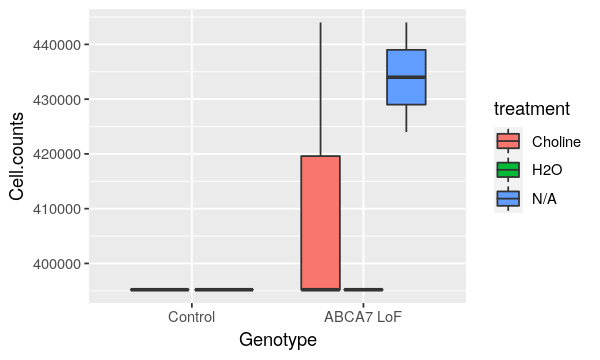

In [229]:
ggplot(data = df2, aes(x = Genotype, y = Cell.counts, fill = treatment)) +
    geom_boxplot() 

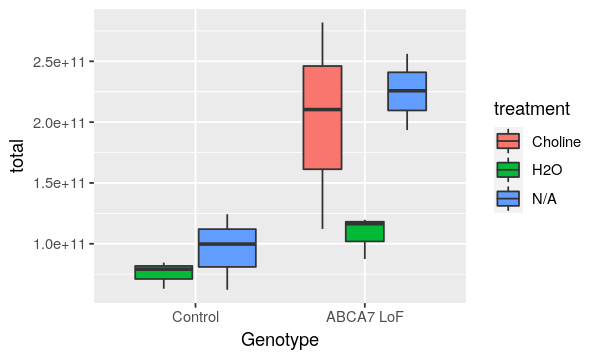

In [228]:
ggplot(data = df2, aes(x = Genotype, y = total, fill = treatment)) +
    geom_boxplot() 

Warning message in grid.Call.graphics(C_rect, x$x, x$y, x$width, x$height, resolveHJust(x$just, :
“supplied color is neither numeric nor character”

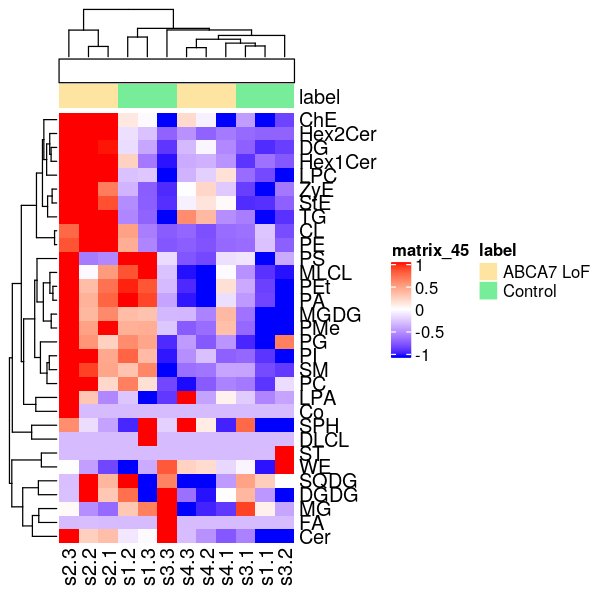

In [191]:
options(repr.plot.width = 5, repr.plot.height = 5)


category_colors <- list('Control' = "blue", 'ABCA7 LoF' = "red")

row_annotation <- columnAnnotation(foo = anno_block(gp = gpar(fill = category_colors[as.character(df2$Genotype)])), label=as.character(df2$Genotype))

library(ComplexHeatmap)
library(circlize)
temp = df2[,1:31]#/df2$total

Heatmap(t(scale((temp[,colMeans(temp)>0.001]
))),top_annotation = c(row_annotation),        col = colorRamp2(c(-1, 0, 1), c("blue", "white", "red")))

Warning message in grid.Call.graphics(C_rect, x$x, x$y, x$width, x$height, resolveHJust(x$just, :
“supplied color is neither numeric nor character”

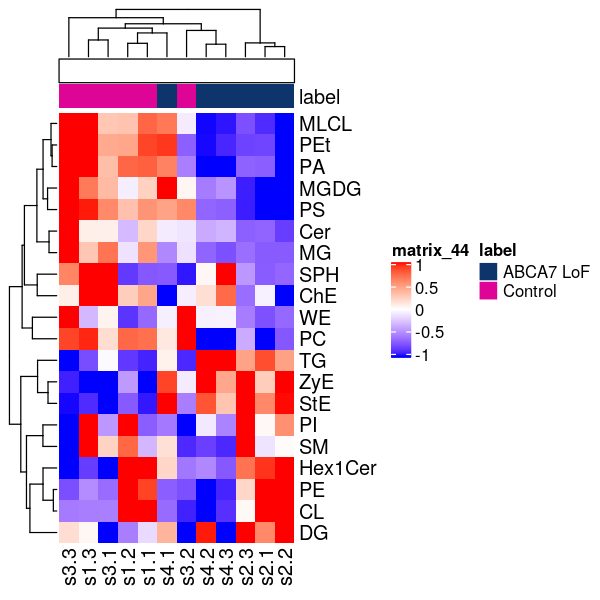

In [189]:
options(repr.plot.width = 5, repr.plot.height = 5)

df2 = df2[df2$treatment!='Choline',]

category_colors <- list('Control' = "blue", 'ABCA7 LoF' = "red")

row_annotation <- columnAnnotation(foo = anno_block(gp = gpar(fill = category_colors[as.character(df2$Genotype)])), label=as.character(df2$Genotype))

library(ComplexHeatmap)
library(circlize)
temp = df2[,1:31]/df2$total

Heatmap(t(scale((temp[,colMeans(temp)>0.001]
))),top_annotation = c(row_annotation),        col = colorRamp2(c(-1, 0, 1), c("blue", "white", "red")))

Warning message:
“Following annotation names are duplicated: foo, label”Warning message in grid.Call.graphics(C_rect, x$x, x$y, x$width, x$height, resolveHJust(x$just, :
“supplied color is neither numeric nor character”Warning message in grid.Call.graphics(C_rect, x$x, x$y, x$width, x$height, resolveHJust(x$just, :
“supplied color is neither numeric nor character”

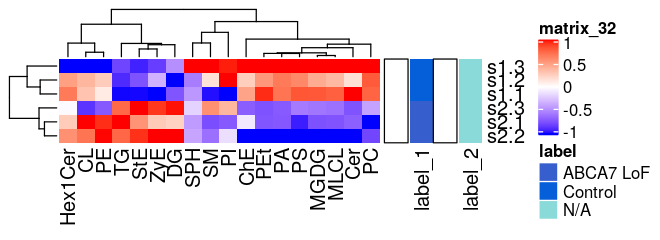

In [170]:
options(repr.plot.width = 5.5, repr.plot.height = 2)

df2 = df2[df2$treatment=='N/A',]

category_colors <- list('Control' = "blue", 'ABCA7 LoF' = "red")

row_annotation <- rowAnnotation(foo = anno_block(gp = gpar(fill = category_colors[as.character(df2$Genotype)])), label=as.character(df2$Genotype))

category_colors <- list('N/A' = "blue", 'H2O' = "blue", "Choline" = 'red')
row_annotation2 <- rowAnnotation(foo = anno_block(gp = gpar(fill = category_colors[as.character(df2$treatment)])), label=as.character(df2$treatment))

library(ComplexHeatmap)
library(circlize)
temp = df2[,1:31]/df2$total

Heatmap((scale((temp[,colMeans(temp)>0.001]
))),right_annotation = c(row_annotation, row_annotation2),        col = colorRamp2(c(-1, 0, 1), c("blue", "white", "red")))

Warning message:
“Following annotation names are duplicated: foo, label”Warning message in grid.Call.graphics(C_rect, x$x, x$y, x$width, x$height, resolveHJust(x$just, :
“supplied color is neither numeric nor character”Warning message in grid.Call.graphics(C_rect, x$x, x$y, x$width, x$height, resolveHJust(x$just, :
“supplied color is neither numeric nor character”

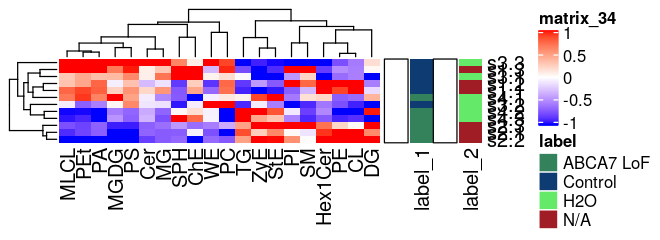

In [173]:
options(repr.plot.width = 5.5, repr.plot.height = 2)

df2 = df2[df2$treatment!='Choline',]

category_colors <- list('Control' = "blue", 'ABCA7 LoF' = "red")

row_annotation <- rowAnnotation(foo = anno_block(gp = gpar(fill = category_colors[as.character(df2$Genotype)])), label=as.character(df2$Genotype))

category_colors <- list('N/A' = "blue", 'H2O' = "blue", "Choline" = 'red')
row_annotation2 <- rowAnnotation(foo = anno_block(gp = gpar(fill = category_colors[as.character(df2$treatment)])), label=as.character(df2$treatment))

library(ComplexHeatmap)
library(circlize)
temp = df2[,1:31]/df2$total

Heatmap((scale((temp[,colMeans(temp)>0.001]
))),right_annotation = c(row_annotation, row_annotation2),        col = colorRamp2(c(-1, 0, 1), c("blue", "white", "red")))

Warning message:
“Following annotation names are duplicated: foo, label”Warning message in grid.Call.graphics(C_rect, x$x, x$y, x$width, x$height, resolveHJust(x$just, :
“supplied color is neither numeric nor character”Warning message in grid.Call.graphics(C_rect, x$x, x$y, x$width, x$height, resolveHJust(x$just, :
“supplied color is neither numeric nor character”

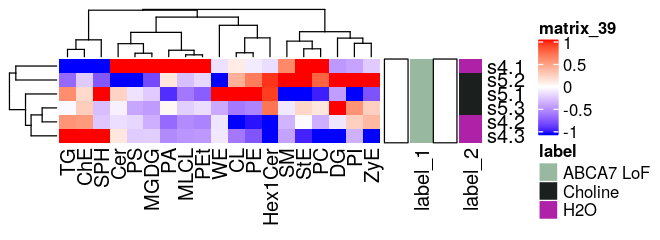

In [182]:
options(repr.plot.width = 5.5, repr.plot.height = 2)

df2 = df2[df2$treatment!='N/A' & df2$Genotype=='ABCA7 LoF',]

category_colors <- list('Control' = "blue", 'ABCA7 LoF' = "red")

row_annotation <- rowAnnotation(foo = anno_block(gp = gpar(fill = category_colors[as.character(df2$Genotype)])), label=as.character(df2$Genotype))

category_colors <- list('N/A' = "blue", 'H2O' = "blue", "Choline" = 'red')
row_annotation2 <- rowAnnotation(foo = anno_block(gp = gpar(fill = category_colors[as.character(df2$treatment)])), label=as.character(df2$treatment))

library(ComplexHeatmap)
library(circlize)
temp = df2[,1:31]/df2$total

Heatmap((scale((temp[,colMeans(temp)>0.001]
))),right_annotation = c(row_annotation, row_annotation2),        col = colorRamp2(c(-1, 0, 1), c("blue", "white", "red")))

In [ ]:
df2['grp'] = paste0(as.character(df2$Genotype), as.character(df2$treatment))

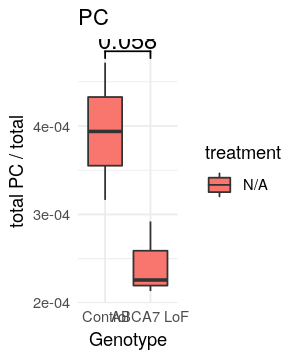

In [78]:
options(repr.plot.width = 2.5, repr.plot.height = 3)

ggplot(df2[df$treatment=='N/A',], aes(x = Genotype, y = PG/total, fill = treatment)) +
  geom_boxplot() +
  labs(x = "Genotype", y = "total PC / total", title = "PC") +
  theme_minimal() +   geom_signif(comparisons = list(c("ABCA7 LoF", "Control")), textsize = 5, test = "t.test", map_signif_level = F) 


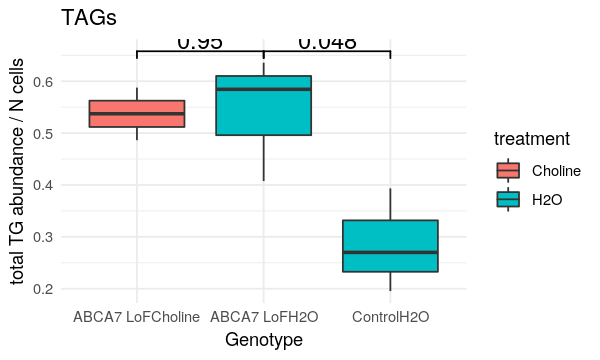

In [227]:
options(repr.plot.width = 5, repr.plot.height = 3)

ggplot(df2[df$treatment!='N/A',], aes(x = grp, y = TG/total, fill = treatment)) +
  geom_boxplot() +
  labs(x = "Genotype", y = "total TG abundance / N cells", title = "TAGs") +
  theme_minimal() +   geom_signif(comparisons = list(c("ABCA7 LoFCholine", "ABCA7 LoFH2O"), c("ABCA7 LoFH2O", "ControlH2O")), textsize = 5, test = "t.test", map_signif_level = F) 


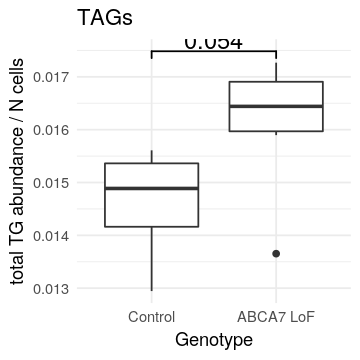

In [9]:
options(repr.plot.width = 3, repr.plot.height = 3)

ggplot(df2, aes(x = Genotype, y = DG/total)) +
  geom_boxplot() +
  labs(x = "Genotype", y = "total TG abundance / N cells", title = "TAGs") +
  theme_minimal() +   geom_signif(comparisons = list(c("ABCA7 LoF", "Control")), textsize = 5, test = "t.test", map_signif_level = F) 


In [28]:
# plot TAG abundance normalized to N cells
options(repr.plot.width = 3, repr.plot.height = 3)

pdf('../pdf_figures/tg_abundance.pdf', width = 3, height = 3)

ggplot(df2, aes(x = Genotype, y = TG/Cell.counts)) +
  geom_boxplot() +
  labs(x = "Genotype", y = "total TG abundance / N cells", title = "TAGs") +
  theme_minimal() +   geom_signif(comparisons = list(c("ABCA7 LoF", "Control")), textsize = 5, test = "t.test", map_signif_level = F) 

dev.off()

png 
  2

In [288]:
# plot the PC to TAG ratio
options(repr.plot.width = 3, repr.plot.height = 3)

pdf('../pdf_figures/pc_tg_ratio.pdf', width = 3, height = 3)

ggplot(df2, aes(x = Genotype, y = (PC)/(TG))) +
  geom_boxplot() +
  labs(x = "Genotype", y = "PC:TAG ratio", title = "PC:TAGs") +
  theme_minimal() +   geom_signif(comparisons = list(c("ABCA7 LoF", "Control")), textsize = 5, test = "t.test", map_signif_level = F) 
dev.off()

png 
  2

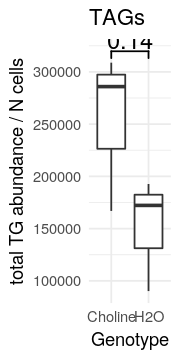

In [279]:
# Plot TAG abundance by cell count for choline vs vehicle treatment

df2 = df[df$treatment!='N/A',]
df2 = df2[df2$Genotype!='Control',]
df2$Genotype = factor(df2$Genotype, levels = c('Control', 'ABCA7 LoF'))

options(repr.plot.width = 1.5, repr.plot.height = 3)

ggplot(df2, aes(x = treatment, y = TG/Cell.counts)) +
  geom_boxplot() +
  labs(x = "Genotype", y = "total TG abundance / N cells", title = "TAGs") +
  theme_minimal() +   geom_signif(comparisons = list(c("Choline", "H2O")), textsize = 5, test = "t.test", map_signif_level = F) 


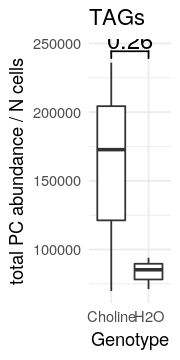

In [281]:
# Plot PC abundance by cell count for choline vs vehicle treatment

options(repr.plot.width = 1.5, repr.plot.height = 3)

ggplot(df2, aes(x = treatment, y = PC/Cell.counts)) +
  geom_boxplot() +
  labs(x = "Genotype", y = "total PC abundance / N cells", title = "TAGs") +
  theme_minimal() +   geom_signif(comparisons = list(c("Choline", "H2O")), textsize = 5, test = "t.test", map_signif_level = F) 


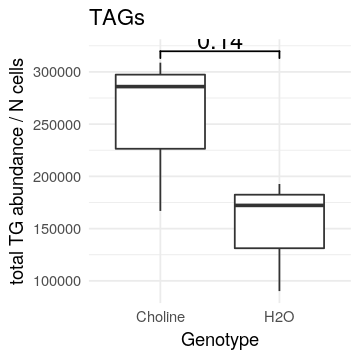

In [257]:
# Create a boxplot
options(repr.plot.width = 3, repr.plot.height = 3)

ggplot(df2, aes(x = treatment, y = TG/Cell.counts)) +
  geom_boxplot() +
  labs(x = "Genotype", y = "total TG abundance / N cells", title = "TAGs") +
  theme_minimal() +   geom_signif(comparisons = list(c("Choline", "H2O")), textsize = 5, test = "t.test", map_signif_level = F) 
